In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 准备数据集
data_path='E:\PyProjects\DataSet\FireAI/data_multivar_imbalance.txt'
df=pd.read_csv(data_path,header=None)
# print(df.head()) # 没有问题
print(df.info()) # 查看数据信息，确保没有错误
dataset_X,dataset_y=df.iloc[:,:-1],df.iloc[:,-1]
# print(dataset_X.head())
# print(dataset_X.info())
# print(dataset_y.head()) # 检查没问题
dataset_X=dataset_X.values
dataset_y=dataset_y.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
0    1200 non-null float64
1    1200 non-null float64
2    1200 non-null int64
dtypes: float64(2), int64(1)
memory usage: 28.2 KB
None


In [10]:
# 将整个数据集划分为train set和test set
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y=train_test_split(
    dataset_X,dataset_y,test_size=0.25,random_state=42)

# 看来直接使用简单的线性SVM分类器难以将class_0区分出来，故而我们要调整数据集中样本的数量权重
from sklearn.metrics import classification_report
from sklearn.svm import SVC


In [11]:
# 计算某个新样本的置信度
new_samples=np.array([[2,1.5],
                      [8,9],
                      [4.8,5.2],
                      [4,4],
                      [2.5,7],
                      [7.6,2],
                      [5.4,5.9]])
classifier3=SVC(kernel='rbf',probability=True) # 比上面的分类器增加了 probability=True参数
classifier3.fit(train_X,train_y)

# 使用训练好的SVM分类器classifier3对新样本进行预测，并给出置信度
for sample in new_samples:
    print('sample: {}, probs: {}'.format(sample,classifier3.predict_proba([sample])[0]))

sample: [2.  1.5], probs: [0.08066588 0.91933412]
sample: [8. 9.], probs: [0.08311977 0.91688023]
sample: [4.8 5.2], probs: [0.14367183 0.85632817]
sample: [4. 4.], probs: [0.06178594 0.93821406]
sample: [2.5 7. ], probs: [0.21050117 0.78949883]
sample: [7.6 2. ], probs: [0.07548128 0.92451872]
sample: [5.4 5.9], probs: [0.45817727 0.54182273]


In [12]:
# 将分类器绘制到图中
def plot_classifier(classifier, X, y):
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0 # 计算图中坐标的范围
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    step_size = 0.01 # 设置step size
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size),
                                     np.arange(y_min, y_max, step_size))
    # 构建网格数据
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape) 
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', 
                linewidth=1, cmap=plt.cm.Paired)
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])), int(max(X[:, 0])), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])), int(max(X[:, 1])), 1.0)))

    plt.show()

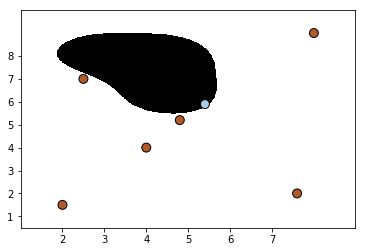

In [13]:
plot_classifier(classifier3,new_samples,classifier3.predict(new_samples))